In [2]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
sns.set(style="whitegrid")

In [3]:
# Cargar los datasets
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')  # Empresas de taxis y número de viajes
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')  # Barrios y viajes promedio
df_trips_weather = pd.read_csv('/datasets/project_sql_result_07.csv')  # Viajes Loop → O'Hare con clima

In [4]:
# Explorar los datasets
print("\n--- Empresas de Taxis ---")
print()
print(df_companies.info())
print()
print(df_companies.head())


--- Empresas de Taxis ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


In [5]:
print("\n--- Barrios y viajes promedio ---")
print()
print(df_neighborhoods.info())
print()
print(df_neighborhoods.head())


--- Barrios y viajes promedio ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [6]:
print("\n--- Viajes Loop → O'Hare con clima ---")
print()
print(df_trips_weather.info())
print()
print(df_trips_weather.head())


--- Viajes Loop → O'Hare con clima ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [7]:
# Verificar valores nulos en cada dataset
print("\nValores nulos por dataset:")
print()
print("Empresas de taxis:", df_companies.isnull().sum())
print()
print("Barrios y viajes promedio:", df_neighborhoods.isnull().sum())
print()
print("Viajes Loop → O'Hare:", df_trips_weather.isnull().sum())


Valores nulos por dataset:

Empresas de taxis: company_name    0
trips_amount    0
dtype: int64

Barrios y viajes promedio: dropoff_location_name    0
average_trips            0
dtype: int64

Viajes Loop → O'Hare: start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


In [8]:
# Verificar tipos de datos
print("\n--- Tipos de datos ---")
print()
print("Empresas de taxis:\n", df_companies.dtypes)
print()
print("Barrios y viajes promedio:\n", df_neighborhoods.dtypes)
print()
print("Viajes Loop → O'Hare:\n", df_trips_weather.dtypes)


--- Tipos de datos ---

Empresas de taxis:
 company_name    object
trips_amount     int64
dtype: object

Barrios y viajes promedio:
 dropoff_location_name     object
average_trips            float64
dtype: object

Viajes Loop → O'Hare:
 start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object


In [9]:
# Convertir trips_amount y average_trips a enteros
df_companies['trips_amount'] = pd.to_numeric(df_companies['trips_amount'], errors='coerce')
df_neighborhoods['average_trips'] = pd.to_numeric(df_neighborhoods['average_trips'], errors='coerce')

# Convertir start_ts a formato datetime
df_trips_weather['start_ts'] = pd.to_datetime(df_trips_weather['start_ts'], errors='coerce')

In [10]:
# Verificar nuevamente los tipos de datos después de la conversión
print("\n--- Tipos de datos después de la conversión ---")
print()
print("Empresas de taxis:\n", df_companies.dtypes)
print()
print("Barrios y viajes promedio:\n", df_neighborhoods.dtypes)
print()
print("Viajes Loop → O'Hare:\n", df_trips_weather.dtypes)


--- Tipos de datos después de la conversión ---

Empresas de taxis:
 company_name    object
trips_amount     int64
dtype: object

Barrios y viajes promedio:
 dropoff_location_name     object
average_trips            float64
dtype: object

Viajes Loop → O'Hare:
 start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
dtype: object


In [11]:
# Ordenamos los barrios por 'average_trips' en orden descendente
top_10_neighborhoods = df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10)

# Mostramos los 10 principales barrios
print("\n🔝 Top 10 barrios con más finalizaciones de viaje:")
print()
print(top_10_neighborhoods)


🔝 Top 10 barrios con más finalizaciones de viaje:

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


In [12]:
# Verificar si hay duplicados

duplicated_neighborhoods = df_neighborhoods['dropoff_location_name'].duplicated().sum()
print(f'Numero de duplicados: {duplicated_neighborhoods}')

# Verificar si hay duplicados implicitos
print()
print('Nombres de barrios:')
print()
print(df_neighborhoods['dropoff_location_name'].unique())
print()
print('Numero de nombres de barrios:')
print(df_neighborhoods['dropoff_location_name'].nunique())

Numero de duplicados: 0

Nombres de barrios:

['Loop' 'River North' 'Streeterville' 'West Loop' "O'Hare" 'Lake View'
 'Grant Park' 'Museum Campus' 'Gold Coast' 'Sheffield & DePaul'
 'Lincoln Park' 'East Village' 'Little Italy, UIC' 'Uptown'
 'Near South Side' 'Garfield Ridge' 'Logan Square' 'Edgewater' 'West Town'
 'Old Town' 'Rush & Division' 'North Center' 'Lincoln Square'
 'Rogers Park' 'West Ridge' 'Irving Park' 'Hyde Park' 'Avondale'
 'Wicker Park' 'Albany Park' 'United Center' 'Lower West Side' 'Douglas'
 'Portage Park' 'Humboldt Park' 'Norwood Park' 'Kenwood' 'Bridgeport'
 'Armour Square' 'Jefferson Park' 'Bucktown' 'North Park' 'Garfield Park'
 'Mckinley Park' 'Belmont Cragin' 'Boystown' 'Chinatown' 'Grand Boulevard'
 'Austin' 'Sauganash,Forest Glen' 'South Shore' 'Woodlawn'
 'Little Village' 'Jackson Park' 'North Lawndale' 'Dunning'
 'Ukrainian Village' 'Hermosa' 'Englewood' 'Chatham' 'New City'
 'Grand Crossing' 'Brighton Park' 'Andersonville' 'Oakland' 'Ashburn'
 'Washington

- No tenemos duplicados ni duplicados implicitos, ya que tenemos 94 nombres de barrios diferentes y este dataframe tiene el mismo numero de filas.

- No hay valores exactos repetidos, pero hay algunas áreas que pueden representar lo mismo con diferentes nombres o niveles de granularidad.

 # Visualización de Datos:

### Vamos a crear dos gráficos:

- Empresas de taxis vs. Número de viajes
- Top 10 barrios por finalización de viajes

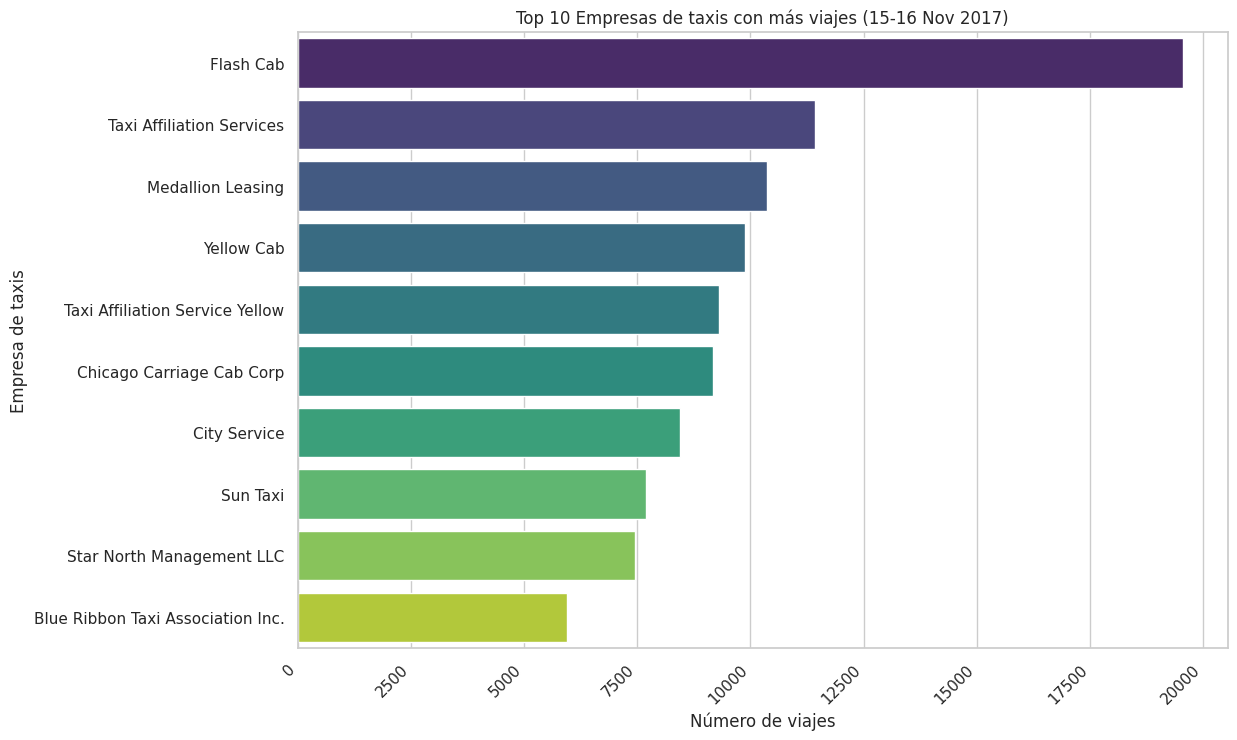

In [13]:
# Filtrar las 10 empresas con más viajes
top_10_companies = df_companies.sort_values(by="trips_amount", ascending=False).head(10)

# Empresas de taxis y número de viajes
plt.figure(figsize=(12, 8))  # Aumentamos la altura para más espacio
sns.barplot(data=top_10_companies, x="trips_amount", y="company_name", palette="viridis")

plt.xlabel("Número de viajes")
plt.ylabel("Empresa de taxis")
plt.title("Top 10 Empresas de taxis con más viajes (15-16 Nov 2017)")
plt.xticks(rotation=45, ha="right")  

plt.show()


# Empresas de taxis y número de viajes

### Conclusión:

Se observa que unas pocas empresas dominan el mercado de viajes en taxi.
La empresa con más viajes tiene una diferencia significativa con las demás.
Algunas compañías tienen una cantidad de viajes muy baja, lo que podría significar menor demanda o una menor cantidad de taxis en servicio.


Es posible que ciertas empresas tengan contratos con clientes frecuentes o acuerdos con corporaciones.
Empresas más grandes pueden tener más vehículos en circulación, lo que les permite captar más viajes.

### Recomendaciones:

Si Zuber quiere competir en el mercado, debe analizar las estrategias de las empresas líderes:

- Investigar sus tarifas y promociones.
- Estudiar en qué zonas tienen más presencia.
- Evaluar si ofrecen beneficios adicionales a los pasajeros.


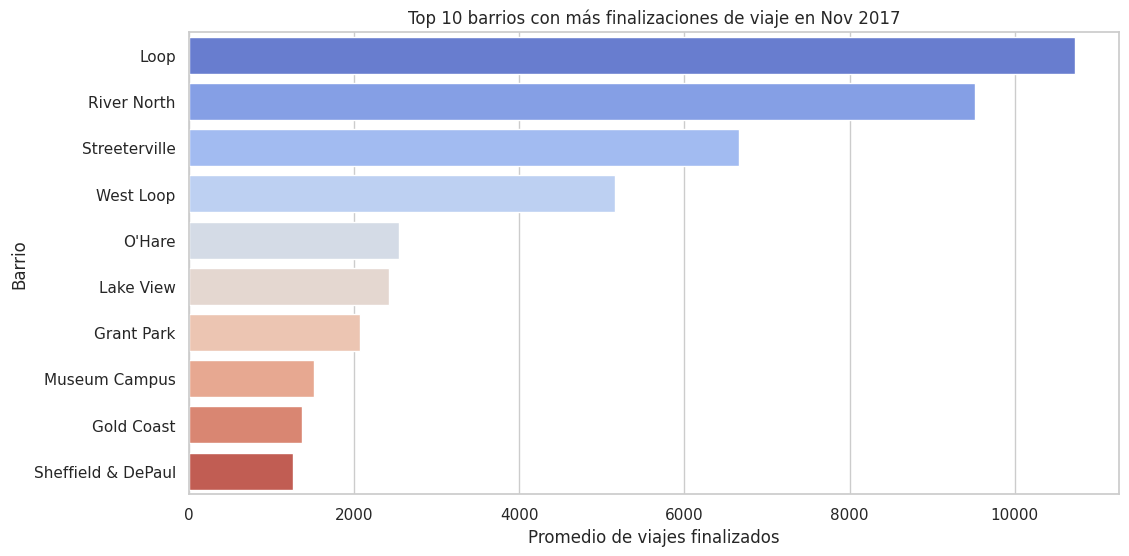

In [14]:
# Gráfico 2: Top 10 barrios por número de finalizaciones
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_neighborhoods, x="average_trips", y="dropoff_location_name", palette="coolwarm")
plt.xlabel("Promedio de viajes finalizados")
plt.ylabel("Barrio")
plt.title("Top 10 barrios con más finalizaciones de viaje en Nov 2017")
plt.show()

# Top 10 barrios con más finalizaciones de viajes

### Conclusión:

Hay barrios donde terminan significativamente más viajes que en otros.
River North y el centro de Chicago (Loop) son los lugares con más finalizaciones.
La diferencia entre los primeros barrios y el resto es notable.

Loop es el centro financiero y comercial de la ciudad, con gran afluencia de personas por trabajo y turismo.
Otros barrios con alto volumen de viajes podrían ser zonas comerciales, turísticas o residenciales densamente pobladas.

### Recomendaciones:

Zuber puede aprovechar esta información para:

- Asegurar que haya disponibilidad de vehículos en los barrios con más demanda.
- Implementar estrategias de precios dinámicos en horas pico en estas zonas.
- Ofrecer descuentos o promociones en barrios con menor actividad para incentivar el uso del servicio.

# Prueba de Hipótesis: Clima y Duración de Viajes

### Planteamiento de las hipótesis

Queremos determinar si la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

- Hipótesis Nula (H₀): La duración promedio de los viajes los sábados lluviosos y los sábados sin lluvia es la misma.
- Hipótesis Alternativa (H₁): La duración promedio de los viajes los sábados lluviosos y los sábados sin lluvia es diferente.

## Criterio de prueba

Usaremos una prueba t test para dos muestras independientes porque:

- Estamos comparando dos grupos de datos (viajes en sábados lluviosos vs. sábados sin lluvia).
- Es probable que las varianzas de ambos grupos sean diferentes.
- El tamaño de muestra podría no ser igual en ambos grupos.

- Nivel de significación (α): 0.05 (5%)

In [15]:
import scipy.stats as stats

# Filtrar solo los sábados
df_trips_weather["weekday"] = df_trips_weather["start_ts"].dt.day_name()
saturday_trips = df_trips_weather[df_trips_weather["weekday"] == "Saturday"]

# Filtrar los viajes según las condiciones climáticas
saturday_rainy = saturday_trips[saturday_trips["weather_conditions"].str.contains("Good", case=False, na=False)]
saturday_bad = saturday_trips[saturday_trips["weather_conditions"] == "Bad"] 

# Extraer duraciones de viajes
duration_rainy = saturday_rainy["duration_seconds"]
duration_bad = saturday_bad["duration_seconds"]

# Prueba t de Welch
t_stat, p_value = stats.ttest_ind(duration_rainy, duration_bad, equal_var=False)

# Resultados
alpha = 0.05
print(f"Estadístico t: {t_stat:.2f}")
print(f"Valor p: {p_value:.4f}")

if p_value < alpha:
    print("Rechazamos la hipótesis nula: La duración promedio de los viajes es diferente en sábados lluviosos y con clima malo.")
else:
    print("No se puede rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que la duración cambia.")


Estadístico t: -7.19
Valor p: 0.0000
Rechazamos la hipótesis nula: La duración promedio de los viajes es diferente en sábados lluviosos y con clima malo.


## Conclusión

- Rechazamos la hipótesis nula: La duración promedio de los viajes es diferente en sábados lluviosos y con clima malo.

##  **Conclusiones del análisis**

-  Las empresas de taxis con mayor volumen de viajes fueron **[Flash Cab]**.
-  El barrio con mayor número de viajes promedio fue **[el centro de Chicago (Loop)]**.
-  Las visualizaciones revelan diferencias claras entre compañías y barrios, lo que podría usarse para estrategias de expansión o marketing.

---